<a href="https://colab.research.google.com/github/Shelvira4/UTS_Bagian-B_Data-Mining/blob/main/UTS_Data_Mining_Shelvira_Rizki_Lestari_4101422047.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Shelvira Rizki Lestari**

**NIM : 4101422047**


**Ujian Tengah Semester**

**Bagian B**

**1). EKSPLORASI AWAL**

**a. Berapa jumlah total penumpang dalam data?**

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [68]:
# Pemanggilan data
data_titanic = pd.read_csv("/content/Titanic-Dataset.csv")

# Cek data
data_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
# Menghitung jumlah data
data_titanic.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Menyimpulkan jumlah penumpang
total_penumpang = len(data_titanic)
print(f"Jumlah total penumpang dalam data: {total_penumpang}")

Jumlah total penumpang dalam data: 891


**b. Berapa jumlah penumpang yang selamat dan tidak selamat? Tampilkan dalam bentuk tabel dan grafik**

In [ ]:
#Menghitung jumlah penumpang selamat dan tidak selamat
count_values = data_titanic['Survived'].value_counts()
print("Jumlah penumpang berdasarkan status keselamatan:")
print("0 = Tidak Selamat, 1 = Selamat")
count_values

Jumlah penumpang berdasarkan status keselamatan:
0 = Tidak Selamat, 1 = Selamat


,count
Survived,
0,549
1,342


Jadi, jumlah penumpang selamat yaitu 342 orang, sedangkan untuk jumlah penumpang yang tidak selamat adalah 549 orang.

In [ ]:
# Tampilan dalam bentuk Tabel
survival_table = pd.DataFrame({
    'Status': ['Tidak Selamat', 'Selamat'],
    'Jumlah': data_titanic['Survived'].value_counts().sort_index().values
})
survival_table

,Status,Jumlah
0,Tidak Selamat,549
1,Selamat,342


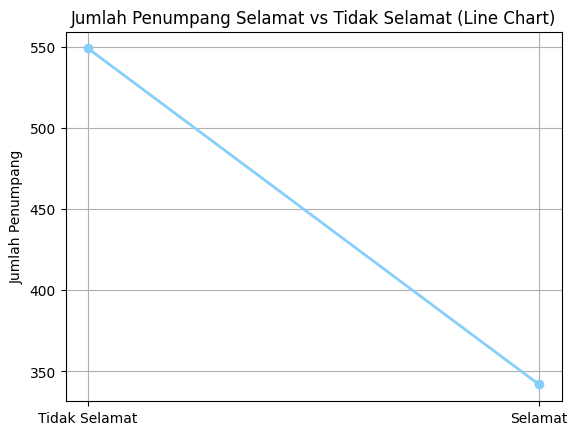

In [ ]:
# Tampilan dalam bentuk grafik (Diagram Garis)
counts = data_titanic['Survived'].value_counts().sort_index()
plt.plot(['Tidak Selamat', 'Selamat'], counts, marker='o', color='lightskyblue', linewidth=2)
plt.title('Jumlah Penumpang Selamat vs Tidak Selamat (Line Chart)')
plt.ylabel('Jumlah Penumpang')
plt.grid(True)
plt.show()

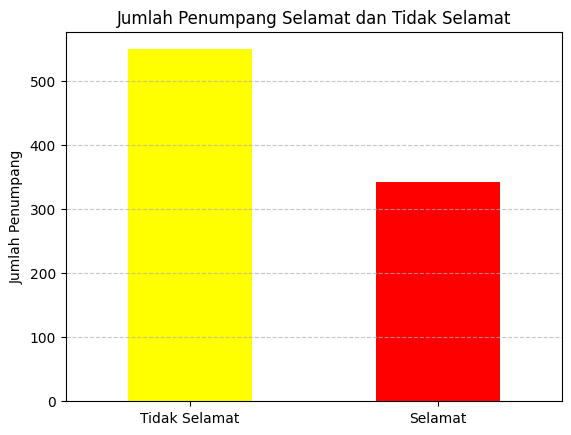

In [ ]:
# Tampilan dalam bentuk grafik (Diagram Batang)
data_titanic_survived = data_titanic['Survived'].value_counts().sort_index()
data_titanic_survived.index = ['Tidak Selamat', 'Selamat']
data_titanic_survived.plot(kind='bar', color=['yellow', 'red'])
plt.title('Jumlah Penumpang Selamat dan Tidak Selamat')
plt.ylabel('Jumlah Penumpang')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**c. Berapa rata-rata umur penumpang? Dan siapa penumpang termuda dan tertua?**

In [ ]:
# Umur penumpang
mean_age = data_titanic['Age'].mean()
min_age = data_titanic['Age'].min()
max_age = data_titanic['Age'].max()

# Rata-rata umur penumpang
print(f"Rata-rata umur penumpang: {mean_age:.2f} tahun")

# Penumpang termuda
penumpang_termuda = data_titanic.loc[data_titanic['Age'] == min_age, ['Name', 'Age']]
print("Penumpang Termuda:")
print(penumpang_termuda)

# Penumpang tertua
penumpang_tertua = data_titanic.loc[data_titanic['Age'] == max_age, ['Name', 'Age']]
print("\nPenumpang Tertua:")
print(penumpang_tertua)

Rata-rata umur penumpang: 29.70 tahun
Penumpang Termuda:
                                Name   Age
803  Thomas, Master. Assad Alexander  0.42

Penumpang Tertua:
                                     Name   Age
630  Barkworth, Mr. Algernon Henry Wilson  80.0


Jadi, rata-rata umur penumpang yaitu 29,7 tahun.

Penumpang termuda bernama Thomas, Master. Assad Alexander. Umurnya yaitu 0,42 tahun.

Penumpang tertua bernama Barkworth, Mr. Algernon Henry Wilson. Umurnya yaitu 80 tahun.





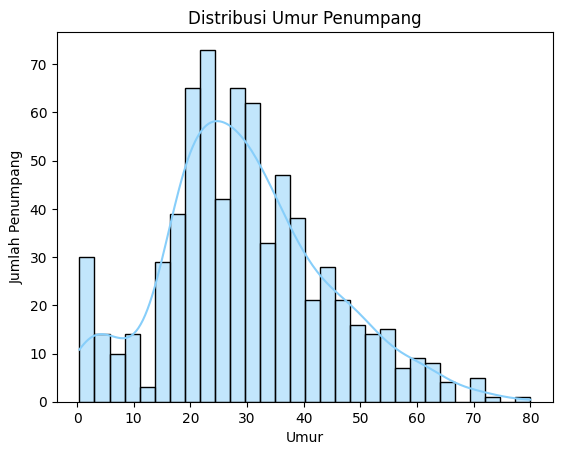

In [70]:
# Visualisasi sebaran umur penumpang
sns.histplot(data_titanic['Age'], kde=True, color='lightskyblue', bins=30)
plt.title('Distribusi Umur Penumpang')
plt.xlabel('Umur')
plt.ylabel('Jumlah Penumpang')
plt.show()

**d. Berapa jumlah penumpang berdasarkan jenis kelamin? Siapa yang lebih banyak? Visualisasikan**

In [ ]:
# Jumlah penumpang berdasarkan jenis kelamin
gender_counts = data_titanic['Sex'].value_counts()
print("Jumlah penumpang berdasarkan jenis kelamin:")
print(gender_counts)

Jumlah penumpang berdasarkan jenis kelamin:
Sex
male      577
female    314
Name: count, dtype: int64


Jumlah penumpang laki-laki: 577 orang.

Jumlah penumpang perempuan: 314 orang.

Jadi, banyaknya penumpang laki-laki lebih banyak dari pada banyaknya penumpang perempuan.

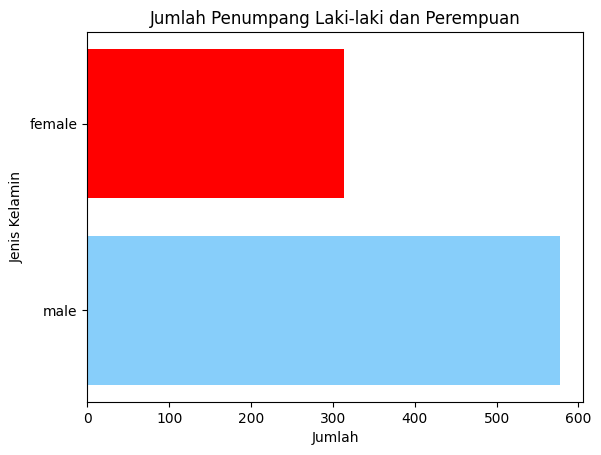

In [ ]:
# Visualisasi sebaran jumlah penumpang berdasarkan jenis kelamin
plt.barh(gender_counts.index, gender_counts.values, color=['lightskyblue', 'red'])
plt.title('Jumlah Penumpang Laki-laki dan Perempuan')
plt.xlabel('Jumlah')
plt.ylabel('Jenis Kelamin')
plt.show()

**e. Tampilkan jumlah penumpang berdasarkan kelas (Pclss) dan berapa persen dari total data yang berada di kelas 1? Visualisasikan**

In [ ]:
# Jumlah penumpang berdasarkan kelas (Pclass)
jumlah_per_kelas = data_titanic['Pclass'].value_counts().sort_index()

# Jumlah total penumpang
total_penumpang = len( data_titanic)

# Persentase kelas 1
persentase_kelas1 = (jumlah_per_kelas[1] / total_penumpang) * 100

# Tampilkan hasil
print("Jumlah Penumpang berdasarkan Kelas (Pclass):")
print(jumlah_per_kelas)
print(f"\nPersentase penumpang yang berada di kelas 1: {persentase_kelas1:.2f}%")

Jumlah Penumpang berdasarkan Kelas (Pclass):
Pclass
1    216
2    184
3    491
Name: count, dtype: int64

Persentase penumpang yang berada di kelas 1: 24.24%


Jumlah penumpang kelas 1 yaitu: 216 orang.

Jumlah penumpang kelas 2 yaitu: 184 orang.

Jumlah penumpang kelas 3 yaitu: 491 orang.

Jumlah keseluruhan penumpang yaitu: 891 orang.

Jadi, persentase penumpang di kelas 1 dari total keseluruhan penumpang adalah 24,24%.


In [ ]:
# Visualisasi sebaran jumlah penumpang berdasarkan Kelas
kelas_table = data_titanic['Pclass'].value_counts(normalize=False).sort_index().reset_index()
kelas_table.columns = ['Kelas', 'Jumlah']
kelas_table['Persentase'] = (kelas_table['Jumlah'] / total_penumpang * 100).round(2)

kelas_table['Kelas'] = kelas_table['Kelas'].map({1: 'Kelas 1', 2: 'Kelas 2', 3: 'Kelas 3'})
kelas_table

,Kelas,Jumlah,Persentase
0,Kelas 1,216,24.24
1,Kelas 2,184,20.65
2,Kelas 3,491,55.11


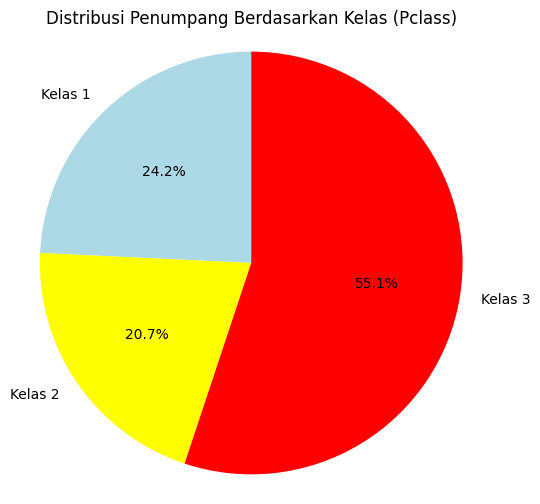

In [ ]:
# Visualisasi sebaran jumlah penumpang (diagram lingkaran)
kelas_counts = data_titanic['Pclass'].value_counts().sort_index()
labels = ['Kelas 1', 'Kelas 2', 'Kelas 3']

plt.figure(figsize=(6, 6))
plt.pie(kelas_counts, labels=labels, autopct='%1.1f%%',
        startangle=90, colors=['lightblue', 'yellow', 'red'])
plt.title('Distribusi Penumpang Berdasarkan Kelas (Pclass)')
plt.axis('equal')
plt.show()

**2). PREPROCESSING**

**a. Apakah terdapat missing value pada data tersebut?**

In [ ]:
# Cek Missing Value
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data_titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Mencari letak missing value dan berapa jumlahnya untuk setiap variabel
np.sum(data_titanic.isnull())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Jumlah missing value di seluruh data set
data_titanic.isnull().sum().sum()

np.int64(866)

Jadi, terdapat Missing Value pada dataset tersebut. Letaknya pada variabel "Age" sebanyak 177; variabel "Cabin" sebanyak 687; dan variabel "Embarked" sebanyak 2.

**b. Jika ya, apa yang Anda lakukan?**

Iya terdapat missing value pada dataset tersebut. Maka perlu dilakukan penanganan (handling) missing value.

In [ ]:
# Penanganan Missing Value

# Mengisi missing value untuk kolom Age
data_titanic['Age']=data_titanic['Age'].fillna(data_titanic['Age'].median())

# Mengisi missing value untuk kolom Cabin
data_titanic['Cabin'] = data_titanic['Cabin'].fillna(data_titanic['Cabin'].mode()[0])

#Mengisi missing value untuk kolom Embarked
data_titanic['Embarked'] = data_titanic['Embarked'].fillna(data_titanic['Embarked'].mode()[0])

In [ ]:
#Melihat data setelah dilakukan penanganan missing value
np.sum(data_titanic.isnull())

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Setalah dilakukan penanganan (handling) missing value, sudah tidak terdapat missing value pada seluruh variabel dalam dataset.

**c. Apakah terdapat outlier pada data set tersebut? Jelaskan apa itu outlier!**

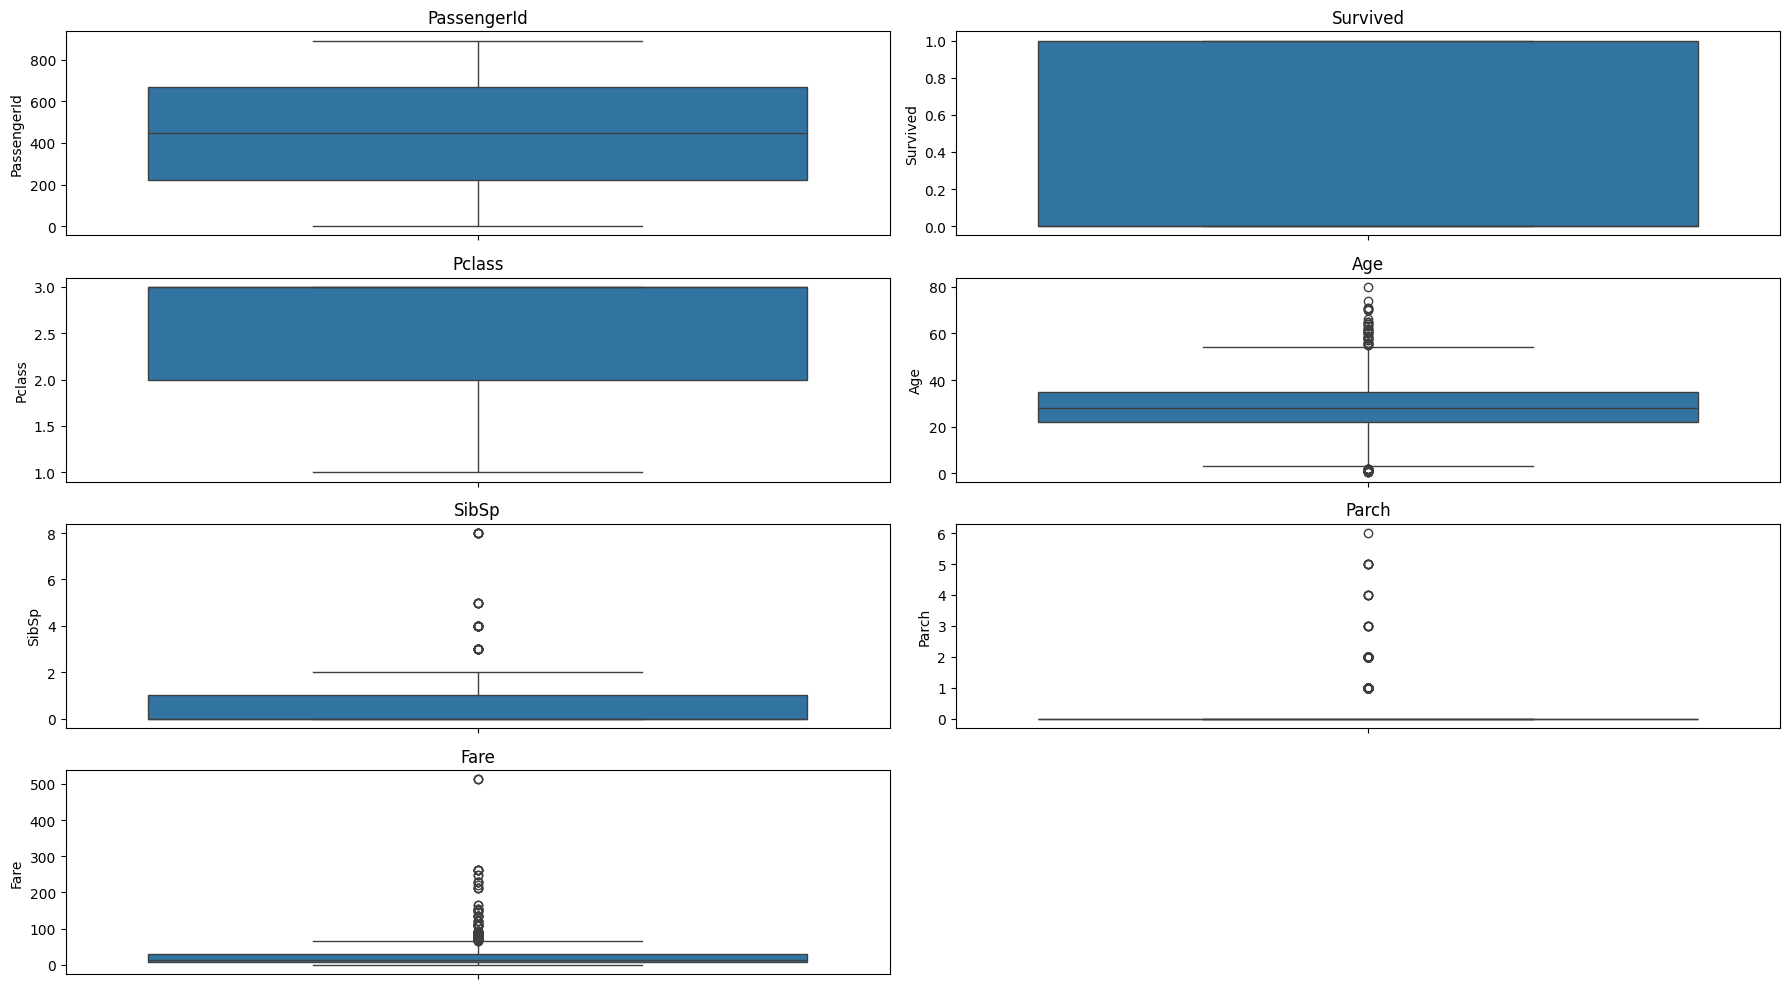

PassengerId: 0 outliers
Survived: 0 outliers
Pclass: 0 outliers
Age: 66 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers


In [ ]:
# Kolom numerik yang ingin dicek outliernya
# Menghapus kolom non-numerik dari num_cols
num_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Visualisasi Boxplot
# Increased the figsize to better accommodate the plots.
plt.figure(figsize=(18, 10))

# Calculate the number of rows needed for subplots
num_rows = int(np.ceil(len(num_cols) / 2))

for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, 2, i)  # Adjust subplot grid dynamically
    sns.boxplot(y=data_titanic[col])
    plt.title(col)

plt.tight_layout()
plt.show()

def detect_outliers_iqr(data_titanic, column):
    Q1 = data_titanic[column].quantile(0.25)  # Kuartil 1
    Q3 = data_titanic[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_titanic[(data_titanic[column] < lower_bound) | (data_titanic[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data_titanic, col)
    print(f"{col}: {len(outliers)} outliers")

Terdapat outlier dalam dataset yaitu pada variabel "Age" = 66 outlier; "SliSp" = 46 outlier; "Parch" = 213 outlier; "Fare" = 116 outlier.



Outlier adalah nilai yang jauh berbeda dari nilai lainnya dalam suatu dataset. Nilai ini muncul sebagai pengecualian dalam pola data yang ada. Nilai yang ada di outlier bisa jauh lebih tinggi maupun lebih rendah dibandingkan dengan nilai-nilai lain dalam dataset. Outlier dapat terjadi karena berbagai kondisi, seperti kesalahan pengukuran, kejadian langka, atau karena faktor lain yang tidak terduga.

**d. Apakah outlier pada data tersebut perlu diatasi serta bagaimana cara mengatasinya?**

Iya, perlu diatasi dengan melakukan penanganan outlier. Metode yang digunakan dalam penanganan outlier ini yakni dengan menggunakan metode Winsorizing (Mengganti Outlier dengan Batas IQR).

In [ ]:
# Penanganan Outluer dengan metode Winsorizing
def winsorize_iqr(data_titanic, column):
    Q1 = data_titanic[column].quantile(0.25)
    Q3 = data_titanic[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_titanic[column] = np.where(data_titanic[column] < lower_bound, lower_bound, data_titanic[column])
    data_titanic[column] = np.where(data_titanic[column] > upper_bound, upper_bound, data_titanic[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data_titanic, col)

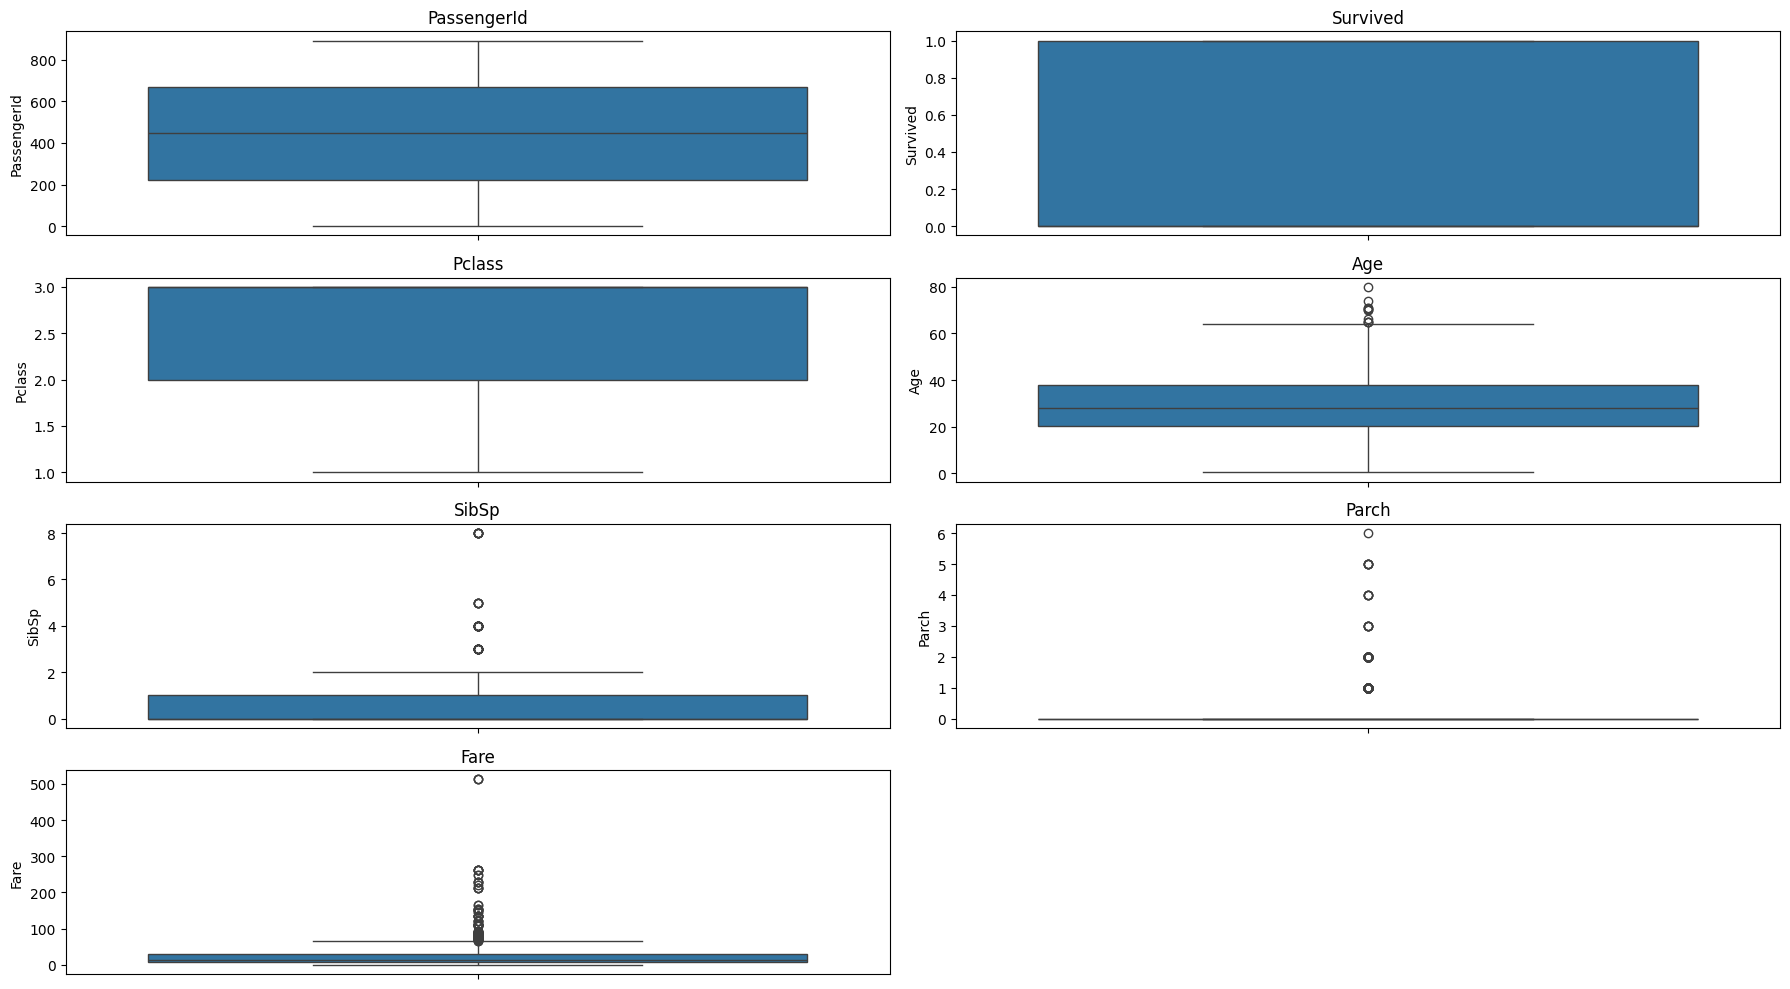

PassengerId: 0 outliers
Survived: 0 outliers
Pclass: 0 outliers
Age: 11 outliers
SibSp: 46 outliers
Parch: 213 outliers
Fare: 116 outliers


In [71]:
# Cek kembali outlier setelah ditangani
num_cols = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Visualisasi Boxplot
# Increased the figsize to better accommodate the plots.
plt.figure(figsize=(18, 10))

# Calculate the number of rows needed for subplots
num_rows = int(np.ceil(len(num_cols) / 2))

for i, col in enumerate(num_cols, 1):
    plt.subplot(num_rows, 2, i)  # Adjust subplot grid dynamically
    sns.boxplot(y=data_titanic[col])
    plt.title(col)

plt.tight_layout()
plt.show()

def detect_outliers_iqr(data_titanic, column):
    Q1 = data_titanic[column].quantile(0.25)  # Kuartil 1
    Q3 = data_titanic[column].quantile(0.75)  # Kuartil 3
    IQR = Q3 - Q1  # Rentang interkuartil
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data_titanic[(data_titanic[column] < lower_bound) | (data_titanic[column] > upper_bound)]

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data_titanic, col)
    print(f"{col}: {len(outliers)} outliers")

Sudah tidak ada outlier pada keseluruhan dataset.

**e. Jika dibutuhkan silahkan lakukan transformasi/standarisasi/scalling terhadap data tersebut?**

In [ ]:
# Melakukan standarisasi/scalling


# Memilih fitur numerik untuk di-scale
fitur_numerik = data_titanic [['Age', 'Fare']].dropna()


# 1. StandardScaler (mean = 0, std = 1)

scaler_std = StandardScaler()
scaled_std = scaler_std.fit_transform(fitur_numerik)

# Membuat DataFrame hasil standardisasi
data_titanic_std = pd.DataFrame(scaled_std, columns=['Age_std', 'Fare_std'])
print("Standard Scaled Data (mean = 0, std = 1):")
print(data_titanic_std.head())

# 2. MinMaxScaler (range 0 - 1)

scaler_mm = MinMaxScaler()
scaled_mm = scaler_mm.fit_transform(fitur_numerik)

# Membuat DataFrame hasil Min-Max scaling
data_titanic_mm = pd.DataFrame(scaled_mm, columns=['Age_minmax', 'Fare_minmax'])
print("\nMin-Max Scaled Data (range 0-1):")
print(data_titanic_mm.head())

Standard Scaled Data (mean = 0, std = 1):
    Age_std  Fare_std
0 -0.583432 -0.820552
1  0.742685  2.031623
2 -0.251903 -0.787578
3  0.494038  1.419297
4  0.494038 -0.781471

Min-Max Scaled Data (range 0-1):
   Age_minmax  Fare_minmax
0    0.375000     0.110460
1    0.682692     1.000000
2    0.451923     0.120745
3    0.625000     0.809027
4    0.625000     0.122649


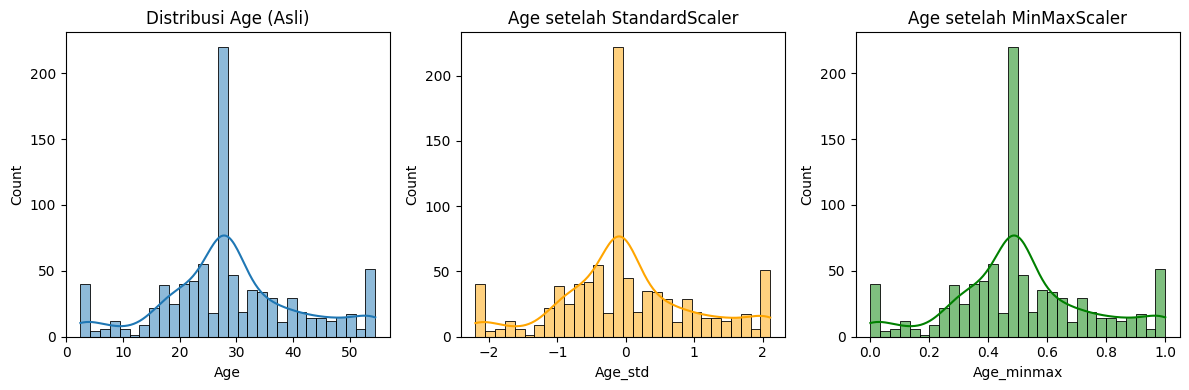

In [ ]:
# Membandingkan distribusi Age sebelum dan sesudah
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(fitur_numerik['Age'], bins=30, kde=True)
plt.title('Distribusi Age (Asli)')

plt.subplot(1, 3, 2)
sns.histplot(data_titanic_std['Age_std'], bins=30, kde=True, color='orange')
plt.title('Age setelah StandardScaler')

plt.subplot(1, 3, 3)
sns.histplot(data_titanic_mm['Age_minmax'], bins=30, kde=True, color='green')
plt.title('Age setelah MinMaxScaler')

plt.tight_layout()
plt.show()


**3). MODELLING**

**a. Jelaskan proses pembagian data menjadi data training dan testing dan alasan mengapa perlu membagi data tersebut.**

Perlunya membagi dataset adalah untuk melatih model pada sebagian data (training set) dan menguji performa model pada data baru yang belum pernah dilihat sebelumnya (testing set). Selain itu, untuk tujuan evaluasi realistis, mencegah overfitting, dan untuk generalization.

In [75]:
# Ambil kolom yang relevan dan bersihkan missing value
data_titanic = data_titanic[['Pclass', 'Sex', 'Age', 'Survived']].dropna()

# Konversi kolom 'Sex' ke numerik
data_titanic['Sex'] = data_titanic['Sex'].map({'male': 0, 'female': 1})

# Pisahkan fitur (X) dan target (y)
X = data_titanic[['Pclass', 'Sex', 'Age']]
y = data_titanic['Survived']

# Bagi data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,           # 20% testing
    random_state=42,
    stratify=y               # menjaga proporsi kelas target
)

# Tampilkan hasil
print(f"Jumlah data total     : {len(data_titanic)}")
print(f"Jumlah data training  : {len(X_train)}")
print(f"Jumlah data testing   : {len(X_test)}")

Jumlah data total     : 714
Jumlah data training  : 571
Jumlah data testing   : 143


Penjelasan pembagian data menjadi data training dan data testing:

1. Memilih fitur dan target -> dari dataset Titanic, dipilih fitur-fitur yang berpengaruh terhadap keselamatan penumpang. Fiturnya yaitu Pclass, Sex, Age, Fare, SibSp, Parch, Embarked. Sedangkan untuk targetnya adalah Supervised.
2. Menangani missing value -> Sebelum membagi data, perlu menangani missing value, agar model tidak error saat pelatihan.
3. Encoding Fitur Kategorikal -> Kolom seperti Sex dan Embarked berupa data kategorikal, sehingga perlu diubah ke bentuk numerik dengan metode one-hot encoding agar bisa digunakan oleh algoritma machine learning.
4. Memisahkan Fitur dan Label ->
X adalah data fitur (tanpa kolom Survived);
y adalah label (kolom Survived)
5. Membagi Data -> Menggunakan fungsi train_test_split dari scikit-learn



**b. Berapa persen pembagiannya? Mengapa memilih membagi dengan proporsi tersebut?**

Menggunalan perbandingan 80% data digunakan untuk training dan 20% data digunakan untuk testing.

Alasannya:

1. Perbandingan 80:20 adalah salah satu proporsi yang paling umum dan efisien digunakan dalam machine learning.
2. 80% data memberikan cukup informasi agar model bisa belajar dengan baik.
3. 20% data testing cukup untuk mengukur performa model pada data baru.
4. Tidak terlalu banyak testing (yang bisa membuat training lemah), tidak terlalu sedikit testing (yang bisa membuat evaluasi bias).


**c. Buatlah model klasifikasi dari 3 algoritma yang berbeda. Jelaskan masing-masing model dan cara kerjanya**

**Logistic Regression**

In [136]:
# Model Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Penjelasan:

Logistic Regression adalah teknik analisis data yang menggunakan matematika untuk menemukan hubungan antara dua faktor data. Kemudian menggunakan hubungan ini untuk memprediksi nilai dari salah satu faktor tersebut berdasarkan faktor yang lain. Prediksi biasanya memiliki jumlah hasil yang terbatas, seperti ya atau tidak.

Cara Kerja:

1. Menggunakan fungsi logistik (sigmoid) untuk mengubah output linier menjadi probabilitas antara 0 dan 1.
2. Jika probabilitas lebih dari 0.5, diklasifikasikan sebagai kelas 1; jika tidak, kelas 0.
3. Model mempelajari koefisien (β) untuk setiap fitur dengan meminimalkan log-loss (fungsi biaya).


**Desition Tree**

In [94]:
# Model Decision Tree
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

Penjelasan:

Decision tree adalah algoritma flowchart berbentuk struktur pohon yang digunakan untuk membantu membuat keputusan atau menyelesaikan tugas yang berkaitan dengan regresi dan klasifikasi. Struktur decision tree dimulai dari simpul akar (root node), cabang, simpul internal (internal node/decision node), dan terakhir simpul daun (leaf node/terminal node).  

Cara Kerja:

1. Data dibagi menggunakan fitur terbaik yang memaksimalkan informasi (entropy/gain).
2. Setiap cabang pohon merupakan kondisi pemisahan, dan daun menunjukkan hasil klasifikasi.
3. Proses berlanjut hingga semua data diklasifikasi atau batas pohon tercapai.


**K-Nearest Neighbor (KNN)**

In [96]:
# Model KNN (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Penjelasan:

K-Nearest Neighbor (KNN) merupakan algoritma yang digunakan untuk mengidentifikasi adanya persamaan antara data baru dan lama. Algoritma KNN akan memasukkan data baru tersebut dalam kategori yang paling mirip dengan kategori yang telah ada sebelumnya. Dengan kata lain, KNN menyimpan seluruh data lama dan mengklasifikasikan data point baru berdasarkan kemiripan.

Cara Kerja:

1. Menentukan jumlah tetangga yg akan kita perhitungkan (k).
2. Menghitung jarak setiap tetangga,lalu urutkan hasilnya berdasarkan jarakmulai dari yang terkecil ke yang terbesar.
3. Mengambil (k) tetangga yg paling dekat, lalu lihat masing-masing dari tetangga tersebut, lalu klasifikasikan berdasarkan mayoritas label tetangga.


**d. Berapa nilai evaluasi dari masing-masing model pada data uji? apa arti dari masing-masing metrik evaluasi tersebut?**

**Logistic Regression**

In [126]:
# Get predictions for the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluasi Logistic Regression
print("\n=== Logistic Regression ===")
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print("Akurasi Logistic Regression:", accuracy_score(y_test, y_pred_logreg)) # Fixed the accuracy label



=== Logistic Regression ===
[[71 14]
 [14 44]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        85
           1       0.76      0.76      0.76        58

    accuracy                           0.80       143
   macro avg       0.80      0.80      0.80       143
weighted avg       0.80      0.80      0.80       143

Akurasi Logistic Regression: 0.8041958041958042


**Decision Tree**

In [93]:
# Evaluasi Decision Tree
print("\n=== Evaluasi Decision Tree ===")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))
print("Akurasi Decision Tree:", accuracy_score(y_test, y_pred_tree))


=== Evaluasi Decision Tree ===
[[82  3]
 [27 31]]
              precision    recall  f1-score   support

           0       0.75      0.96      0.85        85
           1       0.91      0.53      0.67        58

    accuracy                           0.79       143
   macro avg       0.83      0.75      0.76       143
weighted avg       0.82      0.79      0.78       143

Akurasi Decision Tree: 0.7902097902097902


**K-Nearest Neighbor (KNN)**

In [92]:
# Evaluasi KNN
print("\n=== Evaluasi KNN ===")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("Akurasi KNN:", accuracy_score(y_test, y_pred_knn))


=== Evaluasi KNN ===
[[73 12]
 [20 38]]
              precision    recall  f1-score   support

           0       0.78      0.86      0.82        85
           1       0.76      0.66      0.70        58

    accuracy                           0.78       143
   macro avg       0.77      0.76      0.76       143
weighted avg       0.77      0.78      0.77       143

Akurasi KNN: 0.7762237762237763


**Penjelasan Metriks Evaluasi**

1. Accuracy	-> Metrik ini mengukur sejauh mana model dapat mengklasifikasikan data dengan benar dibandingkan dengan total jumlah prediksi. Akurasi dihitung dengan membagi jumlah prediksi yang benar dengan jumlah total prediksi.
2. Precision	-> Presisi mengukur sejauh mana hasil prediksi positif yang diberikan oleh model adalah benar. Dari semua prediksi “selamat”, berapa yang benar-benar selamat.
3. Recall	-> Recall mengukur sejauh mana model dapat mengidentifikasi dengan benar semua hal positif yang ada. Dari semua penumpang yang benar-benar selamat, berapa yang terprediksi selamat.
4. F1-Score	-> F1-score adalah ukuran gabungan antara presisi dan recall. Metrik ini memberikan keseimbangan antara kedua metrik tersebut dan berguna ketika kita ingin mencapai keseimbangan antara presisi dan recall.









**e. Bandingkan hasil dari ketiga algoritma tersebut, mana yang paling bagus? Beri ulasan kira-kira apa yang menyebabkan metode tersebut dapat memprediksi dataset Anda dengan baik.**

In [127]:
#Nilai akurasi
print("\nPerbandingan Akurasi:")
print(f"Akurasi Logistic Regression: {accuracy_score(y_test, y_pred_logreg):.4f}")
print(f"Akurasi Decision Tree: {accuracy_score(y_test, y_pred_tree):.4f}")
print(f"Akurasi KNN        : {accuracy_score(y_test, y_pred_knn):.4f}")


Perbandingan Akurasi:
Akurasi Logistic Regression: 0.8042
Akurasi Decision Tree: 0.7902
Akurasi KNN        : 0.7762


**Perbandingan Hasil Klasifikasi:**


* Model Logistic Regression menghasilkan akurasi yang sangat tinggi, yaitu 80,42%. Hasil ini menunjukkan bahwa model Logistic Regression menunjukkan performa klasifikasi yang sangat baik pada dataset Titanic. Model ini cocok digunakan karena targetnya bersifat biner dan fitur-fiturnya memiliki hubungan linier terhadap variabel target. Selain akurat, Logistic Regression juga sederhana, stabil, dan mudah diinterpretasikan, sehingga menjadi salah satu model yang efektif untuk kasus ini.
* Model Decision Tree menghasilkan
akurasi yang tinggi, yaitu sebesar 79,02%. Hasil ini menunjukkan bahwa model Decision Tree memiliki kemampuan klasifikasi yang baik terhadap dataset ini, karena algoritma ini mampu menangkap hubungan non-linear antara fitur-fitur dalam data. Kemampuan Decision Tree untuk melakukan pemisahan data berdasarkan aturan-aturan yang eksplisit membuatnya sangat efektif dalam mengenali pola-pola penting pada data Titanic, seperti interaksi antara variabel Pclass, Sex, dan Fare dalam menentukan probabilitas seseorang untuk selamat.
sepenuhnya terpenuhi dalam data ini.
* Model KNN menghasilkan akurasi yang jauh cukup tinggi, yaitu sebesar 77,62% yang menunjukkan bahwa model ini mampu mengklasifikasikan data dengan tingkat ketepatan yang cukup tinggi. KNN tidak mengasumsikan distribusi data tertentu dan bekerja dengan pendekatan berbasis kedekatan jarak (tetangga/neighbors) antar data.

**4). EVALUASI**

**a. Berdasarkan classification report model terbaik, berapa nilai precission dan recall untuk prediksi penumpang yang "selamat"?**

In [132]:
# Model terbaik adalah Logistic Regression
best_model_pred = y_pred_logreg

# Tampilkan classification report
report = classification_report(y_test, best_model_pred, output_dict=True)
print(classification_report(y_test, best_model_pred))

# Ambil precision dan recall untuk class "1" (selamat)
precision_selamat = report['1']['precision']
recall_selamat = report['1']['recall']

print(f"Precision untuk penumpang selamat: {precision_selamat:.2f}")
print(f"Recall untuk penumpang selamat: {recall_selamat:.2f}")

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        85
           1       0.76      0.76      0.76        58

    accuracy                           0.80       143
   macro avg       0.80      0.80      0.80       143
weighted avg       0.80      0.80      0.80       143

Precision untuk penumpang selamat: 0.76
Recall untuk penumpang selamat: 0.76


Jadi, berdasarkan classification report model terbaik, nilai precission untuk prediksi penumpang yang "selamat" adalah 0,76 atau 76%. Sedangkan recall untuk prediksi penumpang yang "selamat" adalah 0,76 atau 76%.

**b. Berapa banyak penumpang yang diprediksi selamat, dan berapa di antaranya benar-benar selamat?**

In [133]:
# Gunakan prediksi dari model terbaik (Logistic Regression)
best_model_pred = y_pred_logreg

# Jumlah penumpang yang DIPREDIKSI selamat (Survived = 1)
predicted_selamat = np.sum(best_model_pred == 1)

# Jumlah penumpang yang BENAR-BENAR selamat dan diprediksi selamat (True Positive)
actual_selamat = np.sum((y_test == 1) & (best_model_pred == 1))

print(f"Jumlah penumpang yang DIPREDIKSI selamat: {predicted_selamat}")
print(f"Jumlah penumpang yang BENAR-BENAR selamat (True Positive): {actual_selamat}")

Jumlah penumpang yang DIPREDIKSI selamat: 58
Jumlah penumpang yang BENAR-BENAR selamat (True Positive): 44


Jadi, jumlah penumpang yang DIPREDIKSI selamat adalah 58 orang dan jumlah penumpang yang BENAR-BENAR selamat adalah 44 orang.